
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def acc_loss_plotter(history_dict, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(acc_values) + 1)
    
    ax1.plot(epochs, acc_values, 'k:', label='training accuracy')
    ax1.plot(epochs, val_acc_values, 'b--', label='validation accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.set_title(title)

    ax2.plot(epochs, loss_values, 'k:', label='training loss')
    ax2.plot(epochs, val_loss_values, 'b--', label='validation loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.set_title(title)

In [3]:
def model_set():
    # 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()

    # 第二步：構建網絡層
    model.add(Dense(32,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense(32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense(32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense(32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense(10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())
    
    return model

In [4]:
# 第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

## 以Adam為例調整 batch_size, epoch, 觀察accurancy, loss的變化

Instructions for updating:
Colocations handled automatically by placer.
Total Parameters：28618
Instructions for updating:
Use tf.cast instead.
Total Parameters：28618


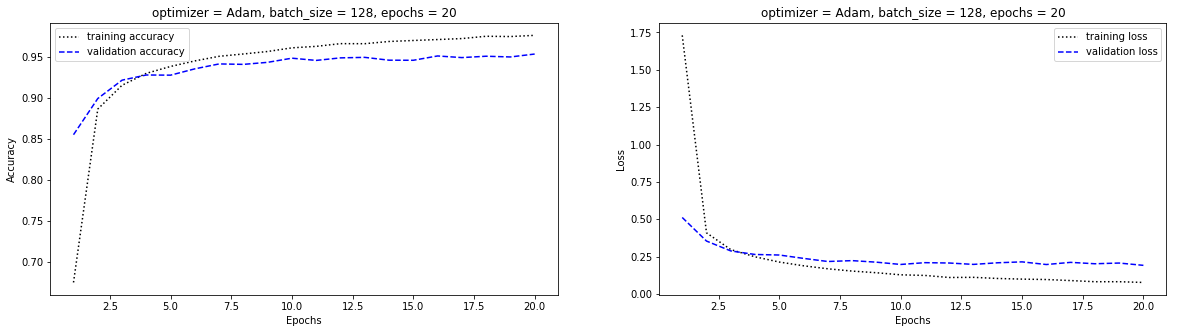

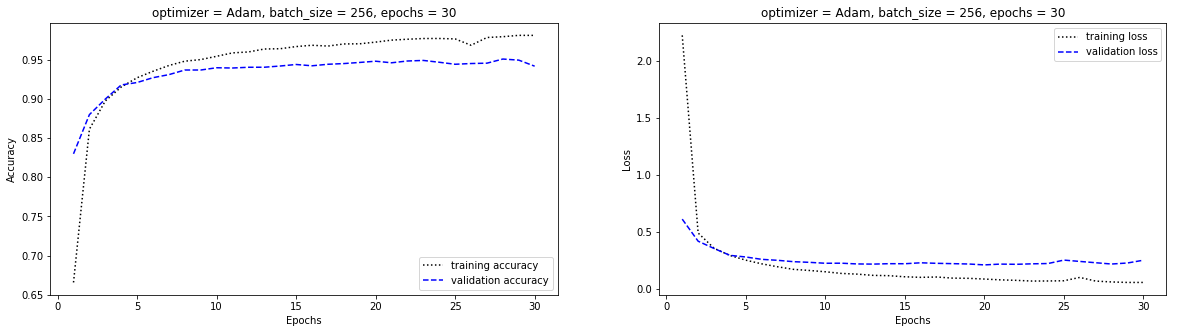

In [5]:
# 第三步：編譯
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
for batch_size, epochs in zip([128, 256], [20, 30]):
    optimizer = 'Adam'
    title = f'optimizer = {optimizer}, batch_size = {batch_size}, epochs = {epochs}'
    model = model_set()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=0, 
                        validation_split=0.3)
    acc_loss_plotter(history.history, title)

## 以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

Total Parameters：28618
Total Parameters：28618
Total Parameters：28618


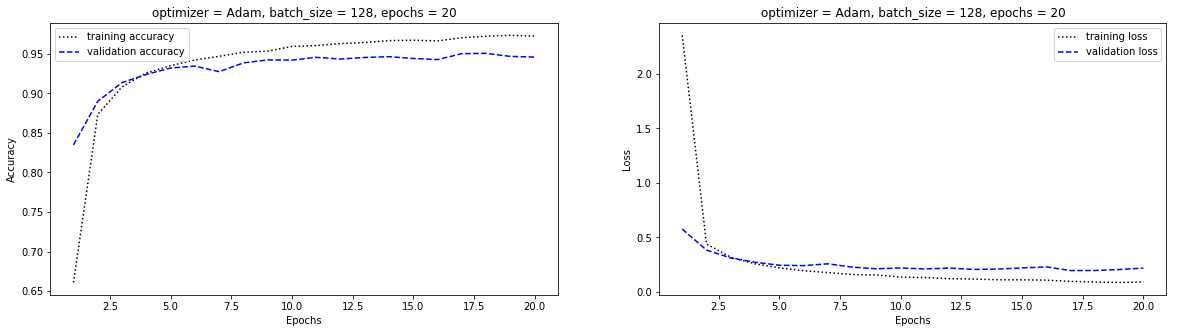

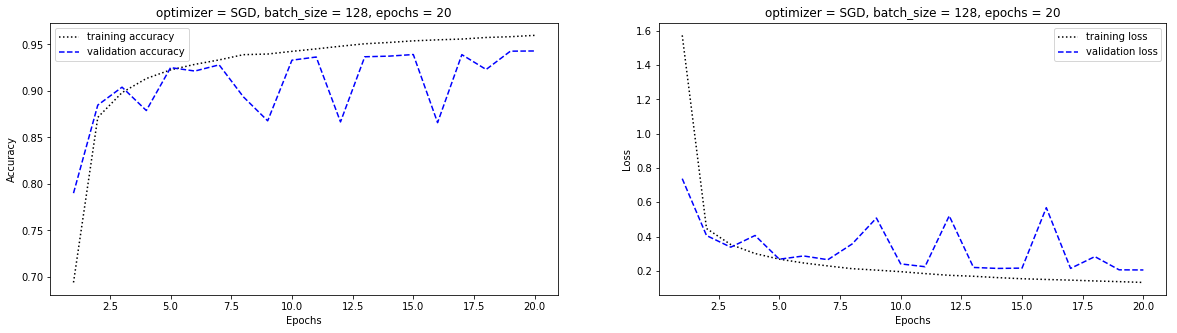

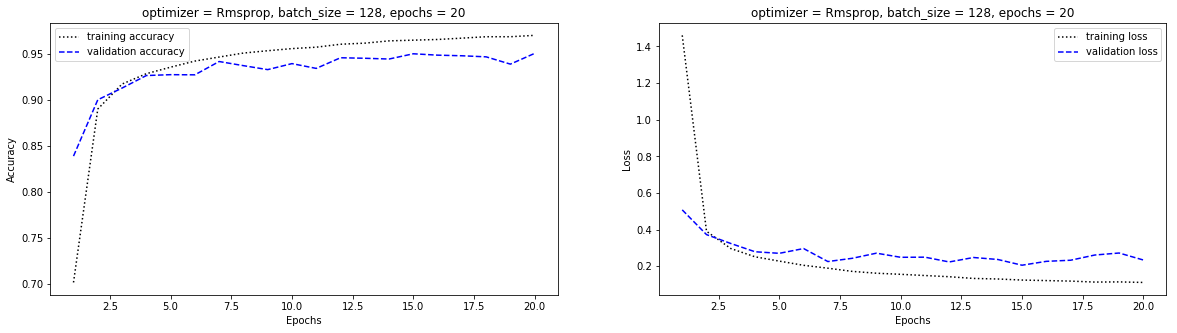

In [6]:
for optimizer in ['Adam', 'SGD', 'Rmsprop']:
    batch_size, epochs = 128, 20  
    title = f'optimizer = {optimizer}, batch_size = {batch_size}, epochs = {epochs}'
    model = model_set()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=0, 
                        validation_split=0.3)
    acc_loss_plotter(history.history, title)

In [8]:
'''
   第五步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 

#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

model = model_set()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=8, verbose=0)

Total Parameters：28618


In [9]:
# 第六步：輸出
evaluation = model.evaluate(X_test, Y_test)
print(f"loss = {evaluation[0]:.3f}, accuracy={evaluation[1]:.3f}")

10000/10000 [==============================] - 1s 97us/step
loss = 0.199, accuracy=0.947
